In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
datelist = [20150630, 20151231, 20160630, 20161231, 20170630, \
           20171231, 20180630, 20181231, 20190430]
applist = [20150630, 20151231, 20160630, 20161230, 20170630, \
           20171229, 20180629, 20181228, 20190430]

In [3]:
def mergedf(olddf, newdf):
    df = pd.concat([olddf, newdf], axis=0, ignore_index=True)
    return df

def decideSemi(date):
    return datelist[applist.index(date)]

In [4]:
fddf = pd.read_csv('Fund-Daily-Semi-20151231-20190430.csv')
fddft = fddf['trade_date'].tolist()
for i in range(0, len(fddft)):
    fddft[i] = pd.to_datetime(str(fddft[i]))
fddf = fddf.drop('Unnamed: 0', axis=1, inplace=False)
fddf = fddf.drop('trade_date', axis=1, inplace=False)
fddf.insert(0, 'date', fddft)

In [5]:
dailydf = pd.read_csv('Daily-tushare-20150101-20190430.csv')
dailydf = dailydf.drop('Unnamed: 0', axis=1, inplace=False)
semidf = pd.DataFrame(columns=['ts_code', 'trade_date', 'open', 'high', 'low', 'close'])
for app in applist:
    appdf = dailydf[dailydf['trade_date']==app]
    semidf = mergedf(semidf, appdf)
funddf = pd.read_csv('Fund-tushare-20151231-20190331.csv')
funddf = funddf.drop('Unnamed: 0', axis=1, inplace=False)

In [6]:
codedf = pd.DataFrame(semidf['ts_code'].values.tolist(), columns=['ts_code'])
codedf = codedf.drop_duplicates(subset=['ts_code'], keep='first')
rawcodelist = codedf['ts_code'].tolist()

returnlist = []
for code in rawcodelist:
    pricedf = semidf[semidf['ts_code']==code]
    pricelist = [code]
    try:
        for date in applist:
            pricelist.append(pricedf[pricedf['trade_date']==date]['close'].values[0])
        returnlist.append(pricelist)
    except:
        pass

codelist = []
for x in returnlist:
    codelist.append(x[0])
    
columns = ['ts_code']
for date in datelist:
    columns.append(str(date))
valuedf = pd.DataFrame(returnlist, columns=columns)
valuedf

,ts_code,20150630,20151231,20160630,20161231,20170630,20171231,20180630,20181231,20190430
0,000001.SZ,14.54,11.99,8.70,9.10,9.39,13.30,9.09,9.38,13.85
1,000009.SZ,16.31,17.96,13.70,10.36,8.09,7.23,4.90,4.31,6.18
2,000027.SZ,12.35,9.81,6.38,6.87,6.73,6.06,4.94,5.25,6.03
3,000039.SZ,32.30,21.00,14.17,14.62,18.03,22.85,13.28,10.58,14.14
4,000046.SZ,14.65,12.55,10.11,9.29,8.73,7.46,5.69,4.67,7.10
5,000060.SZ,18.59,14.03,10.43,11.15,11.20,11.17,4.86,3.96,5.08
6,000063.SZ,23.81,18.63,14.34,15.95,23.74,36.36,13.03,19.59,32.15
7,000069.SZ,12.98,8.80,6.40,6.95,10.06,8.49,7.23,6.35,7.95
8,000157.SZ,8.11,5.35,4.13,4.54,4.49,4.47,4.11,3.56,4.95
9,000333.SZ,37.28,32.82,23.72,28.17,43.04,55.43,52.22,36.86,52.40


In [7]:
semidf1231 = semidf[semidf['trade_date']==20151231]
funddf1231 = funddf[funddf['end_date']==20151231]
weightlist0 = []
total = 0
for code in valuedf['ts_code']:
    try:
        wa = funddf1231[funddf1231['symbol']==code]['amount'].values[0]
        wp = semidf1231[semidf1231['ts_code']==code]['close'].values[0]
        total += wa * wp
    except:
        try:
            total += funddf1231[funddf1231['symbol']==code]['mkv'].values[0]
        except:
            total += 0
for code in valuedf['ts_code']:
    try:
        wa = funddf1231[funddf1231['symbol']==code]['amount'].values[0]
        wp = semidf1231[semidf1231['ts_code']==code]['close'].values[0]
        weight = wa*wp/total
        weightlist0.append(weight)
    except:
        weightlist0.append(0)
np.array(weightlist0).sum()

0.9999999999999999

In [8]:
semidf0430 = semidf[semidf['trade_date']==20190430]
funddf1231 = funddf[funddf['end_date']==20181231]
weightlist1 = []
total = 0
for code in valuedf['ts_code']:
    try:
        wa = funddf1231[funddf1231['symbol']==code]['amount'].values[0]
        wp = semidf0430[semidf0430['ts_code']==code]['close'].values[0]
        total += wa * wp
    except:
        try:
            total += funddf1231[funddf1231['symbol']==code]['mkv'].values[0]
        except:
            total += 0
for code in valuedf['ts_code']:
    try:
        wa = funddf1231[funddf1231['symbol']==code]['amount'].values[0]
        wp = semidf0430[semidf0430['ts_code']==code]['close'].values[0]
        weight = wa*wp/total
        weightlist1.append(weight)
    except:
        weightlist1.append(0)
np.array(weightlist1).sum()

0.9999999999999999

In [9]:
semidf0630 = semidf[semidf['trade_date']==20170630]
funddf0630 = funddf[funddf['end_date']==20170630]
weightlist2 = []
total = 0
for code in valuedf['ts_code']:
    try:
        wa = funddf0630[funddf0630['symbol']==code]['amount'].values[0]
        wp = semidf0630[semidf0630['ts_code']==code]['close'].values[0]
        total += wa * wp
    except:
        try:
            total += funddf0630[funddf0630['symbol']==code]['mkv'].values[0]
        except:
            total += 0
for code in valuedf['ts_code']:
    try:
        wa = funddf0630[funddf0630['symbol']==code]['amount'].values[0]
        wp = semidf0630[semidf0630['ts_code']==code]['close'].values[0]
        weight = wa*wp/total
        weightlist2.append(weight)
    except:
        weightlist2.append(0)
np.array(weightlist2).sum()

1.0000000000000007

In [10]:
valuelist0 = valuedf['20150630'].tolist()
valuelist1 = valuedf['20170630'].tolist()
valuelist2 = valuedf['20190430'].tolist()

In [11]:
np.multiply(np.array(valuelist2), np.array(weightlist1)).sum()

81.93302487243211

In [12]:
np.multiply(np.array(valuelist1), np.array(weightlist2)).sum()

35.05035347468693

In [13]:
def crossover(clist):
    clist = clist[:]
    rdp = np.random.randint(0, (len(clist)-1), 2)
    a = clist[rdp[0]]
    b = clist[rdp[1]]
    clist[rdp[0]] = b
    clist[rdp[1]] = a
    return clist[:]

def mutation(mlist):
    mlist = mlist[:]
    rdp = np.random.randint(0, (len(mlist)-1), 2)
    a = mlist[rdp[0]]
    b = mlist[rdp[1]]
    o1 = weightlist1[rdp[0]]
    o2 = weightlist1[rdp[1]]
    if np.random.rand(1)[0] > 0.5:
        if a > o1 and b > o2:
            if a + 0.01 <= o1 + 0.1 and b + 0.01 <= o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a + 0.01 > o1 + 0.1 and b + 0.01 <= o2 + 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a + 0.01 <= o1 + 0.1 and b + 0.01 > o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
        elif a > o1 and b <= o2:
            if a + 0.01 <= o1 + 0.1 and b - 0.01 >= o2 - 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a + 0.01 <= o1 + 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a + 0.01 > o1 + 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            else:
                pass
        elif a <= o1 and b > o2:
            if a - 0.01 >= o1 - 0.1 and b + 0.01 <= o2 + 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a - 0.01 >= o1 - 0.1 and b + 0.01 > o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a - 0.01 < o1 - 0.1 and b + 0.01 <= o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
        else: # a <= o1 and b <= o2
            if a - 0.01 >= o1 - 0.1 and b - 0.01 >= o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a - 0.01 >= o1 - 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a - 0.01 < o1 - 0.1 and b - 0.01 >= o2 - 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
    else:
        if a > o1 and b > o2:
            if a + 0.01 <= o1 + 0.1 and b + 0.01 <= o2 + 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a + 0.01 > o1 + 0.1 and b + 0.01 <= o2 + 0.1:
                    if a - 0.01 >= 0:
                        a -= 0.01
                        b += 0.01
                    else:
                        pass
            elif a + 0.01 <= o1 + 0.1 and b + 0.01 > o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
        elif a > o1 and b <= o2:
            if a + 0.01 <= o1 + 0.1 and b - 0.01 >= o2 - 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a + 0.01 <= o1 + 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a + 0.01 > o1 + 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            else:
                pass
        elif a <= o1 and b > o2:
            if a - 0.01 >= o1 - 0.1 and b + 0.01 <= o2 + 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a - 0.01 >= o1 - 0.1 and b + 0.01 > o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a - 0.01 < o1 - 0.1 and b + 0.01 <= o2 + 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
        else: # a <= o1 and b <= o2
            if a - 0.01 >= o1 - 0.1 and b - 0.01 >= o2 - 0.1:
                if a - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            elif a - 0.01 >= o1 - 0.1 and b - 0.01 < o2 - 0.1:
                if a - 0.01 >= 0:
                    a -= 0.01
                    b += 0.01
                else:
                    pass
            elif a - 0.01 < o1 - 0.1 and b - 0.01 >= o2 - 0.1:
                if b - 0.01 >= 0:
                    a += 0.01
                    b -= 0.01
                else:
                    pass
            else:
                pass
    return mlist[:]

def selection(slist1, slist2):
    s = []
    s1 = (np.multiply(np.array(slist1), np.array(valuelist1)).sum())/(np.multiply(np.array(slist1), np.array(valuelist0)).sum())
    s2 = (np.multiply(np.array(slist2), np.array(valuelist1)).sum())/(np.multiply(np.array(slist2), np.array(valuelist0)).sum())
    if s1 > s2:
        s = slist1[:]
    else:
        s = slist2[:]
    return s[:]

def ga(weightlist, t):
    start = time.time()
    for i in range(0, t):
        weightlist2 = crossover(weightlist)
        weightlist = selection(weightlist, weightlist2)
        weightlist2 = mutation(weightlist)
        weightlist = selection(weightlist, weightlist2)
    return [np.multiply(np.array(weightlist), np.array(valuelist1)).sum(), \
            np.multiply(np.array(weightlist), np.array(valuelist2)).sum(), np.array(weightlist).sum(), weightlist]

In [14]:
weightlist = []
for x in weightlist0[:]:
    weightlist.append(float(round(x, 3)))
print(np.array(weightlist).sum())

1.004


In [15]:
weightslist = []
for i in range(0, 1000):
    weightslist.append(ga(weightlist, 2000))

In [16]:
weightsdf = pd.DataFrame(weightslist, columns=['train_return', 'test_return', 'sum', 'weights'])
weightsdf = weightsdf.sort_values('test_return', ascending=False)
weightsdf

,train_return,test_return,sum,weights
279,45.75798,73.28613,1.004,"[0.002, 0.003, 0.002, 0.0, 0.001, 0.003, 0.003..."
328,46.75887,72.68778,1.004,"[0.002, 0.002, 0.002, 0.0, 0.0, 0.001, 0.006, ..."
167,45.16018,72.18237,1.004,"[0.002, 0.002, 0.003, 0.001, 0.004, 0.002, 0.0..."
758,44.72469,71.68512,1.004,"[0.002, 0.003, 0.004, 0.0, 0.002, 0.002, 0.005..."
528,45.19315,71.51517,1.004,"[0.002, 0.0, 0.003, 0.0, 0.002, 0.0, 0.004, 0...."
147,44.80795,71.40879,1.004,"[0.002, 0.003, 0.002, 0.0, 0.004, 0.002, 0.003..."
197,44.30883,71.38052,1.004,"[0.003, 0.005, 0.002, 0.001, 0.002, 0.002, 0.0..."
235,45.16561,71.30750,1.004,"[0.004, 0.0, 0.004, 0.0, 0.003, 0.003, 0.002, ..."
351,44.06017,71.16165,1.004,"[0.002, 0.002, 0.003, 0.002, 0.002, 0.003, 0.0..."
74,45.67072,71.11611,1.004,"[0.002, 0.002, 0.002, 0.0, 0.002, 0.002, 0.003..."


In [17]:
# weightsdf.to_csv('weights-sample-1000-1000.csv')

In [18]:
rsdf = weightsdf.drop('weights', axis=1, inplace=False)
# rsdf.to_csv('sample-1000-1000.csv')

In [22]:
ptdf = pd.DataFrame(dailydf['trade_date'].values.tolist(), columns=['trade_date'])
ptdf = ptdf.drop_duplicates(subset=['trade_date'], keep='first')
pt_columns = ptdf['trade_date'].tolist()[243:]
cddf_columns = ['ts_code'] + pt_columns
ptlist = []
for code in codelist:
    cdlist = [code]
    cddf = dailydf[dailydf['ts_code']==code]
    for date in pt_columns:
        try:
            prevv = cddf[cddf['trade_date']==date]['close'].values[0]
            cdlist.append(prevv)
        except:
            cdlist.append(prevv)
    ptlist.append(cdlist)
    print(code, end='\r')
ptdf = pd.DataFrame(ptlist, columns=cddf_columns)
# ptdf.to_csv('Daily-Matrix-20151231-20190430.csv')

In [23]:
# Qian
pt16list = []
for date in pt_columns:
    pt16l = [date]
    pt16l.append(np.multiply(np.array(ptdf[date]), np.array(weightsdf['weights'][279])).sum())
    pt16list.append(pt16l)
pt16df = pd.DataFrame(pt16list, columns=['date', 'value'])
pt16datelist = pt16df['date'].tolist()
for i in range(0, len(pt16datelist)):
    pt16datelist[i] = pd.to_datetime(str(pt16datelist[i]))
pt16df = pt16df.drop('date', axis=1, inplace=False)
pt16df.insert(0, 'date', pt16datelist)
pt16df

,date,value
0,2015-12-31,31.85172
1,2016-01-04,29.80583
2,2016-01-05,29.82530
3,2016-01-06,30.17855
4,2016-01-07,28.12800
5,2016-01-08,28.59103
6,2016-01-11,27.39115
7,2016-01-12,27.36427
8,2016-01-13,27.19009
9,2016-01-14,28.04478


In [24]:
# Qian
changelist = []
for i in range(0, len(pt16list)):
    if i != 0:
        changelist.append((pt16list[i][1]-pt16list[i-1][1])/pt16list[i-1][1])
    else:
        changelist.append(0)
pt16df.insert(2, 'change', changelist)

In [ ]:
# GA
pt12list = []
for date in pt_columns:
    pt12l = [date]
    pt12l.append(np.multiply(np.array(ptdf[date]), np.array(weightsdf['weights'][12])).sum())
    pt12list.append(pt12l)
pt12df = pd.DataFrame(pt12list, columns=['date', 'value'])
pt12datelist = pt12df['date'].tolist()
for i in range(0, len(pt12datelist)):
    pt12datelist[i] = pd.to_datetime(str(pt12datelist[i]))
pt12df = pt12df.drop('date', axis=1, inplace=False)
pt12df.insert(0, 'date', pt12datelist)
pt12df

In [ ]:
# GA
changelist = []
for i in range(0, len(pt12list)):
    if i != 0:
        changelist.append((pt12list[i][1]-pt12list[i-1][1])/pt12list[i-1][1])
    else:
        changelist.append(0)
pt12df.insert(2, 'change', changelist)

In [ ]:
# NN
pt34list = []
for date in pt_columns:
    pt34l = [date]
    pt34l.append(np.multiply(np.array(ptdf[date]), np.array(weightsdf['weights'][34])).sum())
    pt34list.append(pt34l)
pt34df = pd.DataFrame(pt34list, columns=['date', 'value'])
pt34datelist = pt34df['date'].tolist()
for i in range(0, len(pt34datelist)):
    pt34datelist[i] = pd.to_datetime(str(pt34datelist[i]))
pt34df = pt34df.drop('date', axis=1, inplace=False)
pt34df.insert(0, 'date', pt34datelist)
pt34df

In [ ]:
# NN
changelist = []
for i in range(0, len(pt34list)):
    if i != 0:
        changelist.append((pt34list[i][1]-pt34list[i-1][1])/pt34list[i-1][1])
    else:
        changelist.append(0)
pt34df.insert(2, 'change', changelist)

C:\Users\Alfred\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '时间')

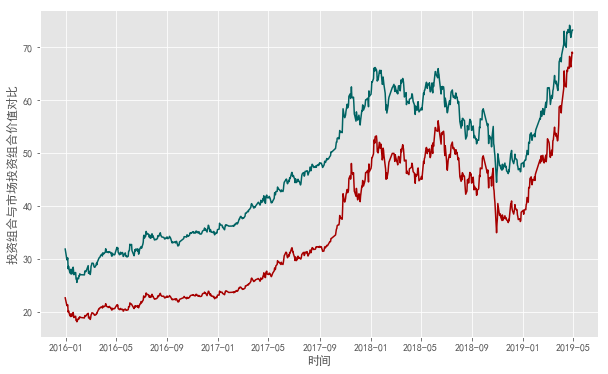

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
idplt = plt.gca()
idplt.plot(fddf['date'], fddf['value'], color='#A60000')
idplt.plot(pt16df['date'], pt16df['value'], color='#006363')
# idplt.plot(pt34df['date'], pt34df['value'], color='#679B00')
plt.ylabel('投资组合与市场投资组合价值对比')
plt.xlabel('时间')

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
idplt = plt.gca()
idplt.plot(fddf['date'], fddf['change'], color='#A60000')
idplt.plot(pt12df['date'], pt12df['change'], color='#006363')
idplt.plot(pt34df['date'], pt34df['change'], color='#679B00')
plt.ylabel('投资组合与市场投资组合收益率对比')
plt.xlabel('时间')

In [ ]:
fddf.to_csv('market-20151231-20190430.csv')

In [ ]:
pt12df.to_csv('portfolio-ga-20151231-20190430.csv')

In [ ]:
pptdf = pd.read_csv('Daily-Matrix-20151231-20190430.csv')
pptdf = pptdf.drop('Unnamed: 0', axis=1, inplace=False)
pptdf

In [ ]:
len(np.array(pptdf[283:284])[0].tolist())

In [ ]:
rmlist = []
rmslist = []
for i in range(0, len(pptdf)):
    rmlist.append(np.array(pptdf[i:i+1])[0].tolist())
for c in rmlist:
    rlist = [c[0], c[1]]
    for j in range(2, len(c)):
        rlist.append(c[j]/c[j-1] - 1)
    rmslist.append(rlist)
rmsdf = pd.DataFrame(rmslist, columns=cddf_columns)
rmsdf = rmsdf.drop(20151231, axis=1, inplace=False)
rmsdf

In [ ]:
betalist = []
betaslist = []
bbetalist = fddf['change'].tolist()
for i in range(0, len(rmsdf)):
    betalist.append(np.array(rmsdf[i:i+1])[0].tolist())
for r in betalist:
    blist = [r[0]]
    for j in range(1, len(r)):
        blist.append(r[j]/bbetalist[j])
    betaslist.append(blist)
beta_columns = ['ts_code'] + cddf_columns[2:]
betasdf = pd.DataFrame(betaslist, columns=beta_columns)
betasdf

In [ ]:
betasdf.to_csv('Beta-Matrix-20160101-20190430.csv')

In [ ]:
betaslist

In [ ]:
tbetaslist = []
for b in betaslist:
    tlist = [b[0]]
    for k in b[1:]:
        if k >= 1:
            tlist.append(1)
        elif k <= -1:
            tlist.append(-1)
        else:
            tlist.append(0)
    tbetaslist.append(tlist)
tbetasdf = pd.DataFrame(tbetaslist, columns=beta_columns)
tbetasdf

In [ ]:
tbetasdf.to_csv('Beta-01-Matrix-20160101-20190430.csv')

In [ ]:
pt34list